C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6176 (\N{MONGOLIAN LETTER A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6178 (\N{MONGOLIAN LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6177 (\N{MONGOLIAN LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6180 (\N{MONGOLIAN LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6189 (\N{MONGOLIAN LETTER GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6184 (\N{MONGOLIAN LETTER NA}) mis

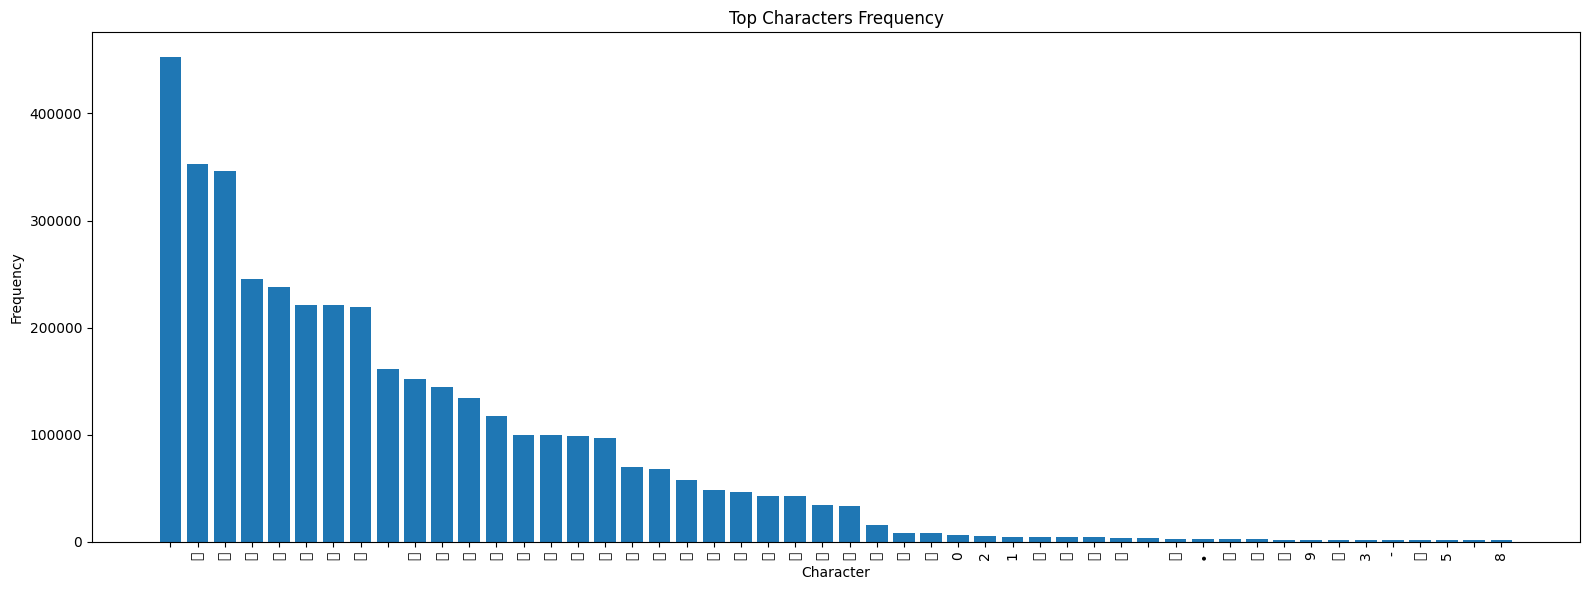

C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6180 (\N{MONGOLIAN LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6184 (\N{MONGOLIAN LETTER NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6178 (\N{MONGOLIAN LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6191 (\N{MONGOLIAN LETTER LA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6192 (\N{MONGOLIAN LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6182 (\N{MONGOLIAN LETTER UE}) m

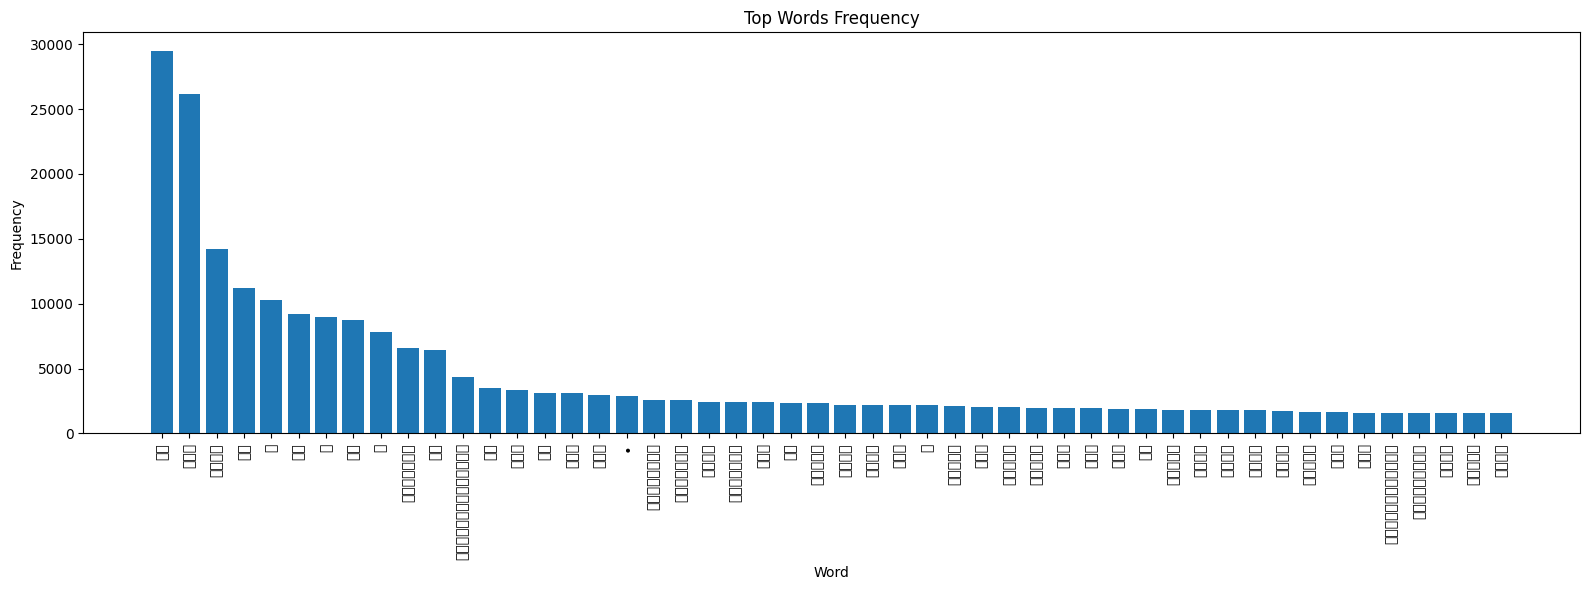

In [3]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import re

# 1. Load your JSON file
with open("../adiya/web_scrap/scraped_data/president_news.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# 2. Combine all text into one big string
# all_text = []
# for news in data:
#     all_text.extend(news['data'])

all_text = []
for key, value in data.items():
    all_text.extend(value.get("text", []))  # safe get


joined_text = " ".join(all_text)

# 3. Count characters
char_counter = Counter(joined_text)

# 4. Count words – we split on whitespace
words = re.findall(r"\S+", joined_text)
word_counter = Counter(words)

# 5. Plot character frequencies
def plot_counter(counter, title, xlabel, ylabel, top_n=50):
    most_common = counter.most_common(top_n)
    items, counts = zip(*most_common)

    plt.figure(figsize=(16, 6))
    plt.bar(range(len(items)), counts, tick_label=[f'{i}' for i in items])
    plt.xticks(rotation=90)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

plot_counter(char_counter, "Top Characters Frequency", "Character", "Frequency")
plot_counter(word_counter, "Top Words Frequency", "Word", "Frequency")


In [5]:
char_counter


Counter({' ': 453099,
         'ᠠ': 353081,
         'ᠢ': 346727,
         'ᠡ': 245827,
         'ᠤ': 238372,
         'ᠭ': 221356,
         'ᠨ': 221133,
         'ᠯ': 219160,
         '\u202f': 161595,
         'ᠦ': 152389,
         'ᠷ': 144279,
         'ᠬ': 134291,
         'ᠳ': 117355,
         'ᠣ': 99962,
         'ᠲ': 99440,
         'ᠪ': 98919,
         'ᠰ': 97049,
         'ᠵ': 69510,
         'ᠮ': 67943,
         'ᠴ': 58089,
         'ᠥ': 48470,
         'ᠶ': 46640,
         '᠂': 43142,
         '\u180e': 42801,
         '᠋': 34343,
         'ᠩ': 33522,
         '᠃': 15643,
         'ᠧ': 8423,
         '᠍': 7934,
         '0': 6777,
         '2': 5081,
         '1': 4941,
         'ᠫ': 4298,
         '》': 4153,
         '《': 4123,
         'ᠺ': 3742,
         '\n': 3353,
         'ᠸ': 3074,
         '∙': 2898,
         'ᠱ': 2746,
         '᠌': 2339,
         '᠊': 2078,
         '9': 1949,
         'ᠽ': 1835,
         '3': 1746,
         '-': 1731,
         'ᠻ': 1689,
         

In [4]:
len(char_counter)

220

In [6]:
vocab = ["<blank>", "<pad>", " "] + [chr(v) for v in (
    list(range(0x1800, 0x180F)) +
    list(range(0x1810, 0x181A)) +
    list(range(0x1820, 0x1879)) +
    list(range(0x1880, 0x18AB)) +
    [0x202F]
)]

# Count how many registered chars are in vocab
my_vocab = [c for c in char_counter if c in vocab]

print(f"Number of characters from char_counter that are in vocab: {len(my_vocab)}")

Number of characters from char_counter that are in vocab: 58


C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6176 (\N{MONGOLIAN LETTER A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6178 (\N{MONGOLIAN LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6177 (\N{MONGOLIAN LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6180 (\N{MONGOLIAN LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6184 (\N{MONGOLIAN LETTER NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6189 (\N{MONGOLIAN LETTER GA}) mis

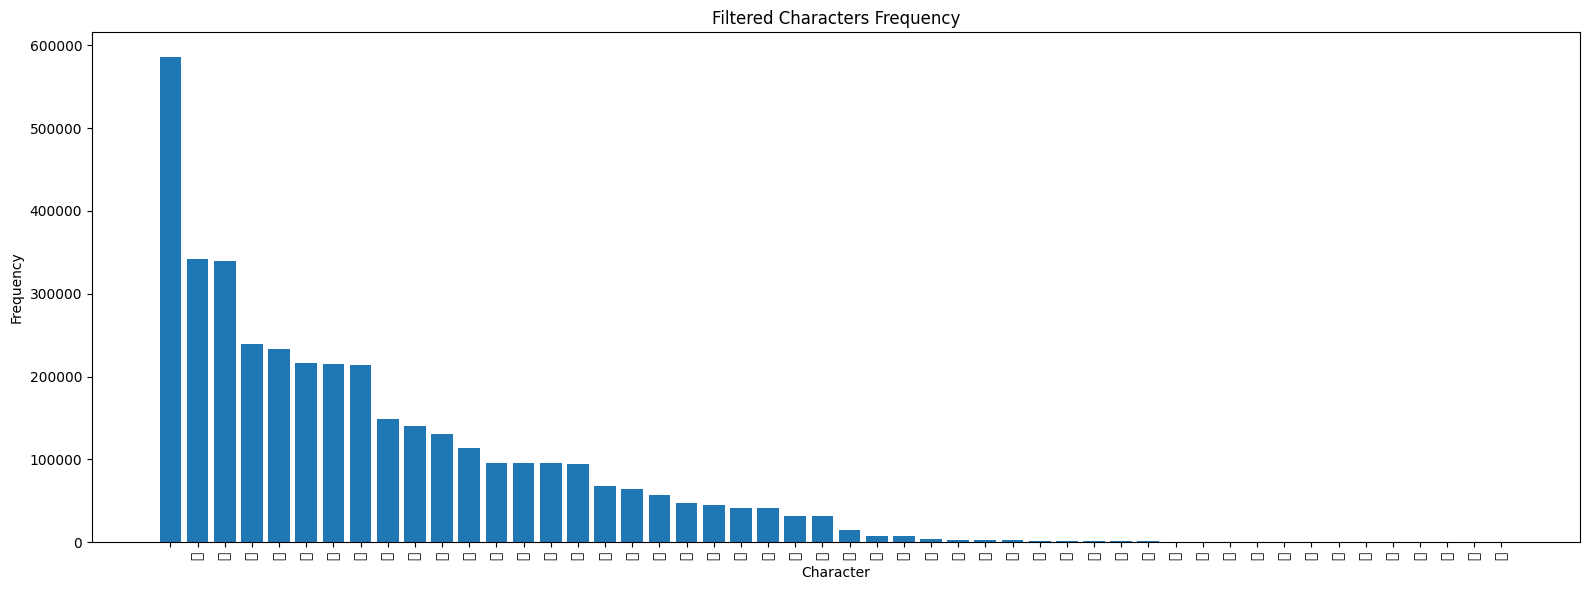

C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6180 (\N{MONGOLIAN LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6184 (\N{MONGOLIAN LETTER NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6178 (\N{MONGOLIAN LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6191 (\N{MONGOLIAN LETTER LA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6192 (\N{MONGOLIAN LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\domogdog\AppData\Local\Temp\ipykernel_18408\3024117486.py:40: UserWarning: Glyph 6182 (\N{MONGOLIAN LETTER UE}) m

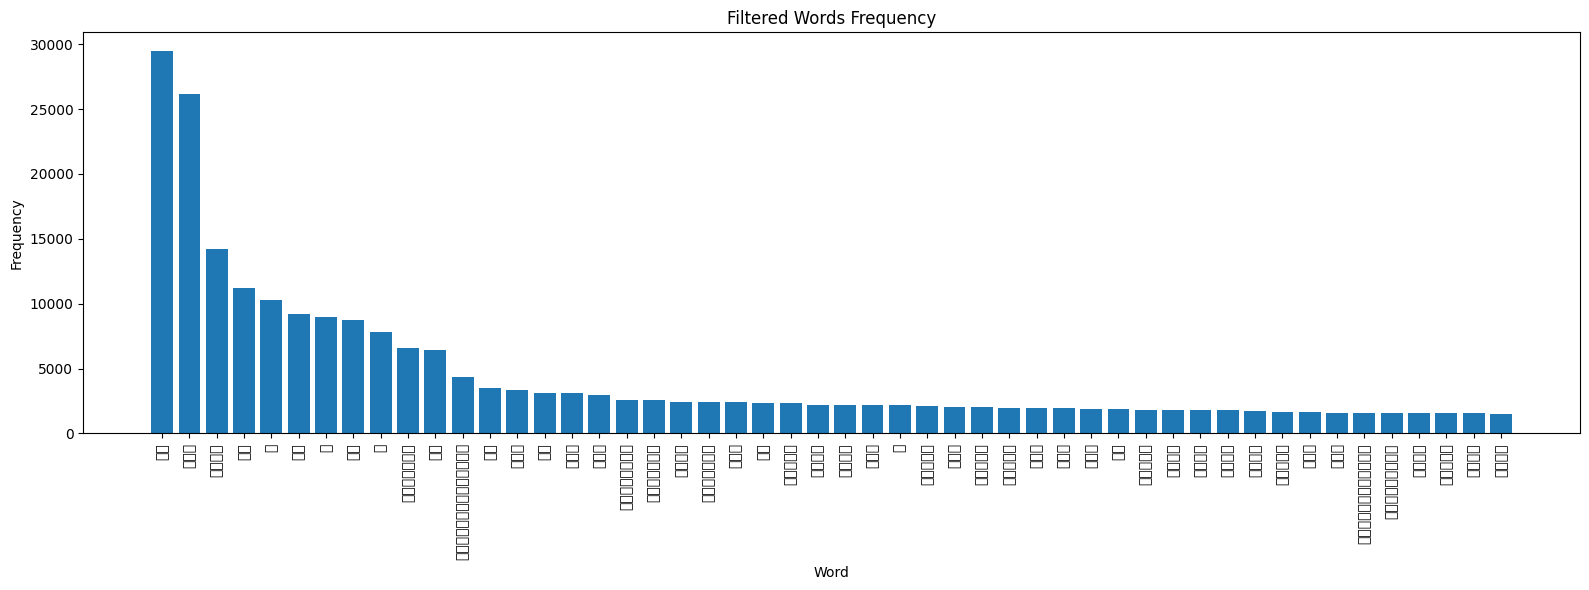

Total words after filtering: 586147


In [7]:
# Define a set for fast lookup
vocab_set = set(my_vocab)

# Only keep words where all characters are in vocab
filtered_words = [word for word in words if all(char in vocab_set for char in word)]

# Join them back into a filtered text (optional)
filtered_text = " ".join(filtered_words)

# Count again if needed
filtered_word_counter = Counter(filtered_words)
filtered_char_counter = Counter(filtered_text)

# Plot (optional)
plot_counter(filtered_char_counter, "Filtered Characters Frequency", "Character", "Frequency")
plot_counter(filtered_word_counter, "Filtered Words Frequency", "Word", "Frequency")

print(f"Total words after filtering: {len(filtered_words)}")


In [8]:
unique_words = set(filtered_words)

# Count
print(f"Number of unique words: {len(unique_words)}")

Number of unique words: 25759


In [9]:
unique_words

{'ᠨᠸᠳ᠋ᡁᠧᠷᠯᠠᠨ᠋ᠳ᠋',
 'ᠲᠥᠰᠥᠪᠲᠦ',
 'ᠤᠳᠤᠷᠢᠳᠤᠭᠴᠢ',
 'ᠨᠠᠮᠠᠬᠠᠢ',
 'ᠶᠭᠢᠫᠧᠲ',
 'ᠮᠠᠰᠲ᠋ᠸᠷ',
 'ᠠᠽᠠᠽᠠ',
 'ᠵᠠᠬᠢᠷᠤᠭᠳᠠᠨ᠂',
 'ᠰᠢᠳᠤᠷᠭ\u180eᠠ',
 'ᠲᠡᠷᠲᠡᠭᠡᠬᠢ',
 'ᠤᠳᠠᠰᠤ',
 'ᠲᠤᠰᠬᠠᠢᠢᠯᠠᠭᠰᠠᠨ',
 'ᠱᠣᠰᠢᠭᠠᠨ',
 'ᠦᠢᠯᠡᠳᠪᠦᠷᠢᠯᠡᠨ᠂',
 'ᠰᠢᠮᠡᠳᠭᠡᠯ',
 'ᠨᠡᠮᠡᠭᠦᠯᠵᠦ',
 'ᠠᠷᠬᠢᠸ',
 'ᠭᠦᠨᠵᠡᠭᠡᠶᠢᠷᠡᠭᠦᠯᠬᠦ᠂',
 'ᠭᠠᠷᠤᠭᠠᠳ',
 'ᠦᠯᠢᠭᠡᠷᠯᠡᠭᠰᠡᠨ᠂',
 'ᠳ᠋ᠦᠩᠨᠡᠵᠡᠢ᠃',
 'ᠪᠣᠯᠭᠣᠮᠵᠢ',
 'ᠳᠠᠪᠤᠤ᠂',
 'ᠪᠦᠯᠢᠳᠣᠽᠧᠷ᠂',
 'ᠮᠡᠳᠡᠯᠴᠡᠵᠦ᠂',
 'ᠸᠢᠤᠢᠡᠭ',
 'ᠪᠠᠨᠽᠠᠷᠷᠠᠭᠴᠠ',
 'ᠱᠠᠩᠨᠠᠯ\u180eᠠ',
 'ᠴᠡᠴᠡᠯᠡᠭᠰᠡᠨ',
 'ᠪᠠᠶᠢᠭᠤᠯᠤᠭᠳᠠᠬᠤ',
 'ᠢᠯᠠᠵᠤ',
 'ᠰᠤᠷᠠᠯᠴᠠᠬᠤ',
 'ᠲᠡᠳᠬᠦᠯᢉᠡᠳ᠋ᠦ',
 'ᠡᠯᠢᠭᠡ᠂',
 'ᠵᠣᠬᠢᠶᠠᠯ᠂',
 'ᠪᠦᠷᠢᠳᠦᠬᠦ',
 'ᠭᠠᠩᠲᠡᠮᠦᠷ\u180e',
 'ᠳᠠᠷᠠᠭ\u180eᠠ᠄',
 'ᠭᠦᠢᠴᠡᠳᠬᠡᠯ\u180eᠡ᠃',
 'ᠵᠦᠳᠣᠴᠢ',
 'ᠪᠠᠭᠠᠨ\u180eᠠ᠂',
 'ᠹᠢᠲ᠋ᠨᠧᠰ᠂',
 'ᠡᠷᠳᠡᠨᠢᠪᠠᠲᠤᠳᠤ',
 'ᠶᠤᠮ᠃ᠦᠨᠳᠦᠰᠦᠨ',
 'ᠠᠶᠠᠳᠠᠭᠤ',
 'ᠪᠤᠷᠭᠠᠰᠤᠲᠠᠢ',
 'ᠲᠡᠰᠦᠷᠡᠯᠲᠡ',
 'ᠰᠣᠷᠭᠤᠭ',
 'ᠪᠠᠰᠠ',
 'ᠲᠡᠮᠡᠦᠯᠡᠯ',
 'ᠲᠠᠢᠢᠰᠢᠷ',
 'ᠣᠷᠣᠯᠴᠠᠳᠠᠭ᠃',
 'ᠪᠠᠭᠤᠵᠤ',
 'ᠤᠤᠳ',
 'ᠪᠥᠷᠢᠨ',
 'ᠪᠦᠲᠦᠭᠰᠡᠨ',
 'ᠢᠨᠲ᠋ᠧᠷᠨᠠᠼᠢᠣᠨᠠᠯ',
 'ᠴᠡᠩ᠋ᠭᠡᠵᠦ',
 'ᠪᠠᠬᠠᠷᠬᠠᠯ\u180e',
 'ᠲᠤᠯᠭ\u180eᠠ',
 'ᠨᠡᠷᠡᠲᠦ',
 'ᠪᠣᠳᠣᠯ',
 'ᠳ᠋ᠤᠭᠠᠷ',
 'ᠰᠠᠭᠤᠯᠭᠠᠬᠤ',
 'ᠠᠩᠬᠡᠪᠠᠶᠠᠷ',
 'ᠠᠮᠤᠭᠤᠯᠠᠩ᠍ᠪᠠᠶᠠᠷ᠂',
 'ᠶᠠᠷᠢᠬᠤ᠂',
 'ᠬᠣᠰᠢᠭᠤᠴᠢᠭᠠᠩᠪᠠᠭᠠᠲᠤᠷ',
 'ᠲᠣᠭᠣᠭᠠᠪᠤᠷᠤ᠂ᠭᠠᠪᠢᠶᠠᠲᠤ',
 'ᠮᠤᠵᠢᠯᠠ